In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

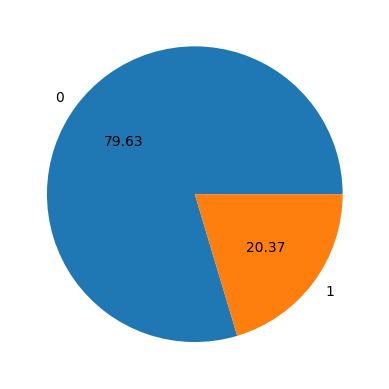

In [10]:
plt.pie(data['Exited'].value_counts(),labels = ['0','1'],autopct="%0.2f")
plt.show()

In [11]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


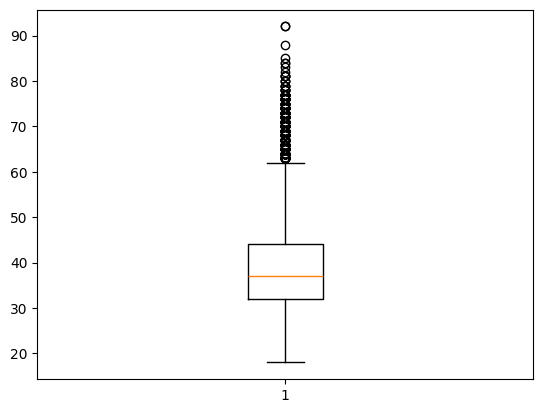

In [12]:
plt.boxplot(data.Age)
plt.show()

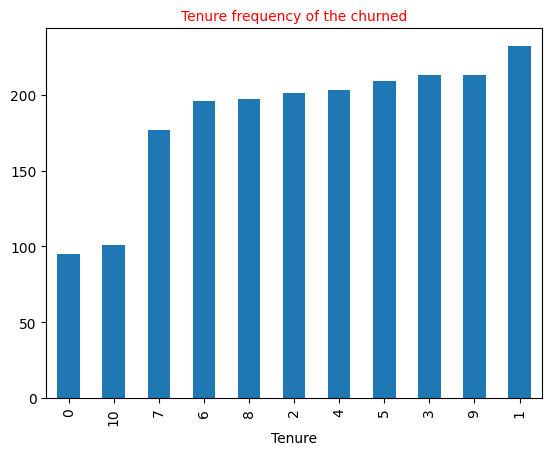

<Axes: title={'center': 'Tenure frequency of the not churned'}, xlabel='Tenure'>

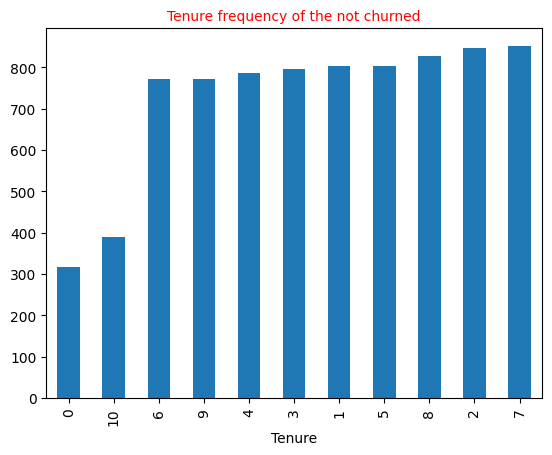

In [13]:
plt.title('Tenure frequency of the churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==1]['Tenure'].value_counts().sort_values().plot.bar()
plt.show()
plt.title('Tenure frequency of the not churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==0]['Tenure'].value_counts().sort_values().plot.bar()

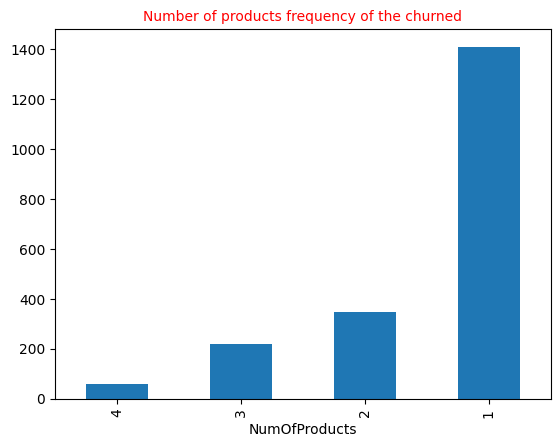

<Axes: title={'center': 'Number of products frequency of not churned'}, xlabel='NumOfProducts'>

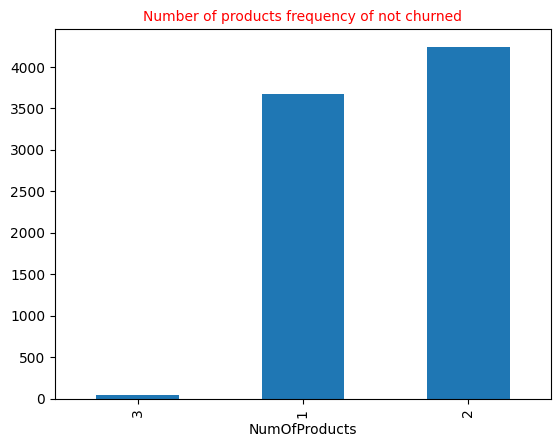

In [14]:
plt.title('Number of products frequency of the churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==1]['NumOfProducts'].value_counts().sort_values().plot.bar()
plt.show()
plt.title('Number of products frequency of not churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==0]['NumOfProducts'].value_counts().sort_values().plot.bar()

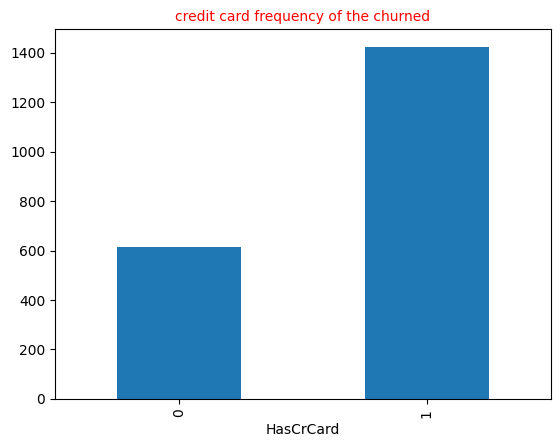

<Axes: title={'center': 'credit card frequency of not churned'}, xlabel='HasCrCard'>

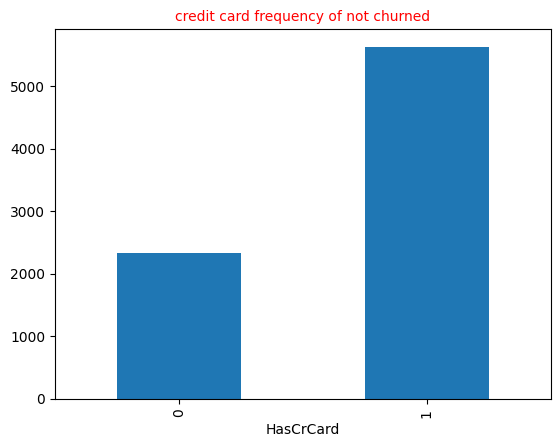

In [15]:
plt.title('credit card frequency of the churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==1]['HasCrCard'].value_counts().sort_values().plot.bar()
plt.show()
plt.title('credit card frequency of not churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==0]['HasCrCard'].value_counts().sort_values().plot.bar()

In [16]:
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


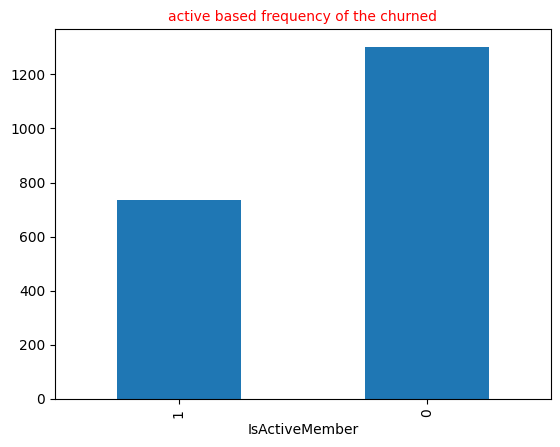

<Axes: title={'center': 'active based frequency of not churned'}, xlabel='IsActiveMember'>

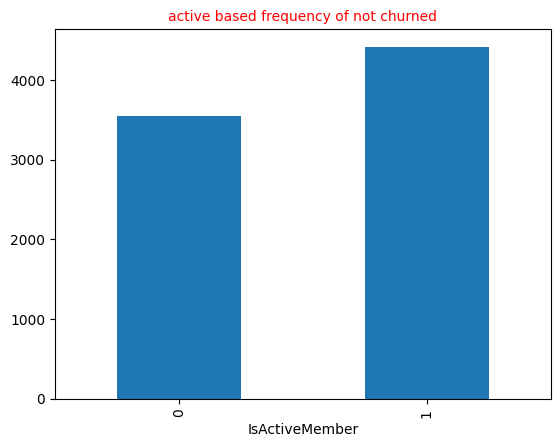

In [17]:
plt.title('active based frequency of the churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==1]['IsActiveMember'].value_counts().sort_values().plot.bar()
plt.show()
plt.title('active based frequency of not churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==0]['IsActiveMember'].value_counts().sort_values().plot.bar()

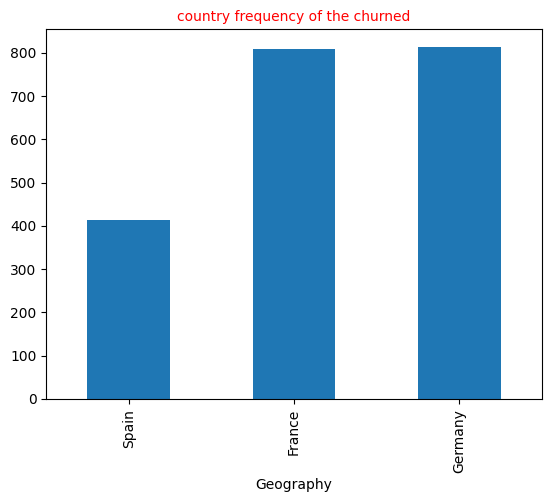

<Axes: title={'center': 'country frequency of not churned'}, xlabel='Geography'>

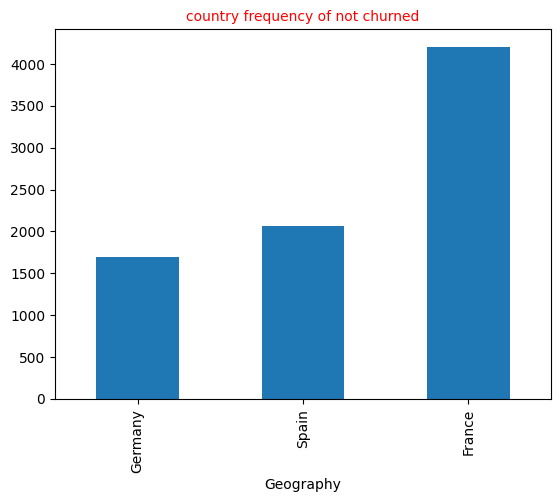

In [18]:
plt.title('country frequency of the churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==1]['Geography'].value_counts().sort_values().plot.bar()
plt.show()
plt.title('country frequency of not churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==0]['Geography'].value_counts().sort_values().plot.bar()

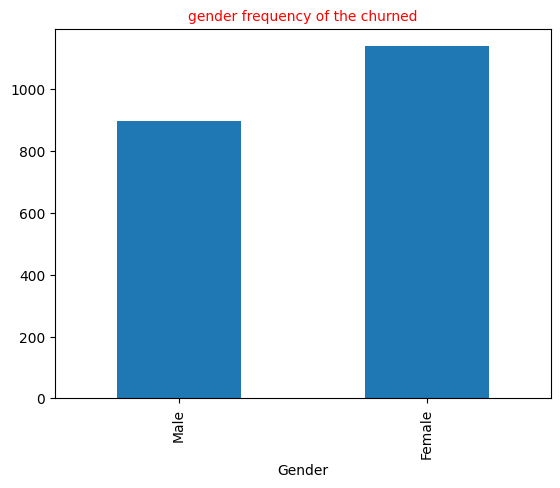

<Axes: title={'center': 'gender frequency of not churned'}, xlabel='Gender'>

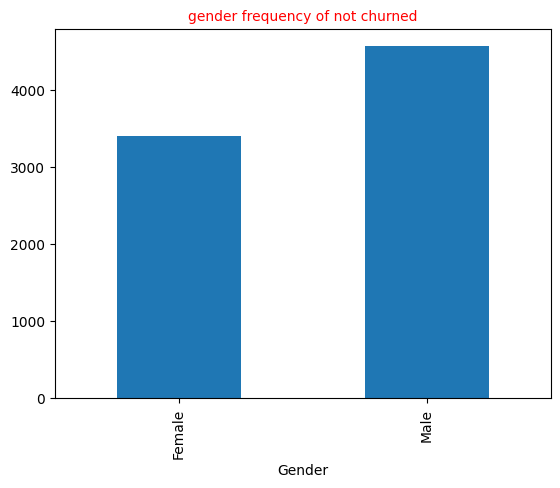

In [19]:
plt.title('gender frequency of the churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==1]['Gender'].value_counts().sort_values().plot.bar()
plt.show()
plt.title('gender frequency of not churned', fontsize= 10, color = 'Red', fontweight = 100)
data.loc[data['Exited']==0]['Gender'].value_counts().sort_values().plot.bar()

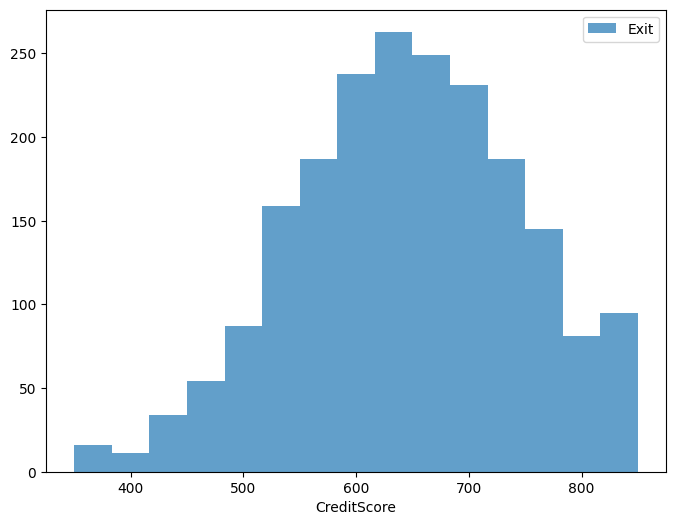

In [20]:
# distribution of the Credit Score for not_exit
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
plt.hist(data.loc[data['Exited']==1]["CreditScore"],bins=15, alpha=0.7, label='Exit')
plt.legend(loc='upper right')
plt.show()

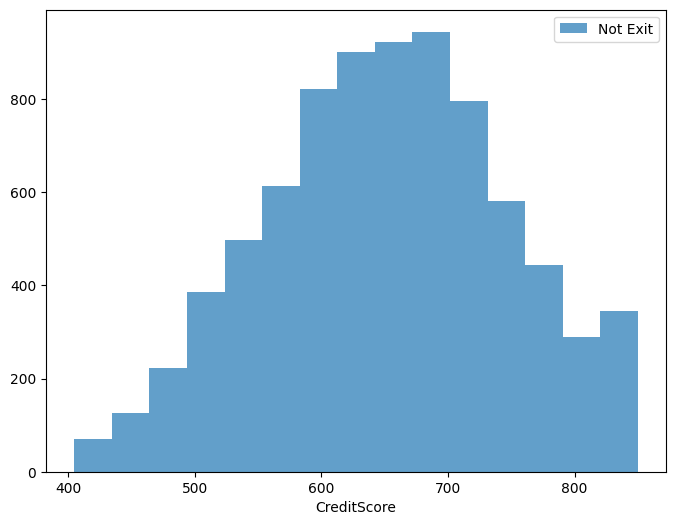

In [21]:
# distribution of the Credit Score for not_exit
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore')
plt.hist(data.loc[data['Exited']==0]["CreditScore"],bins=15, alpha=0.7, label='Not Exit')
plt.legend(loc='upper right')
plt.show()

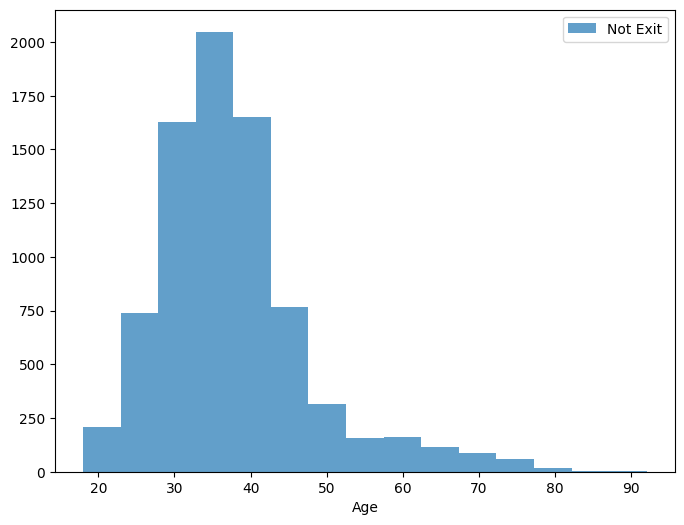

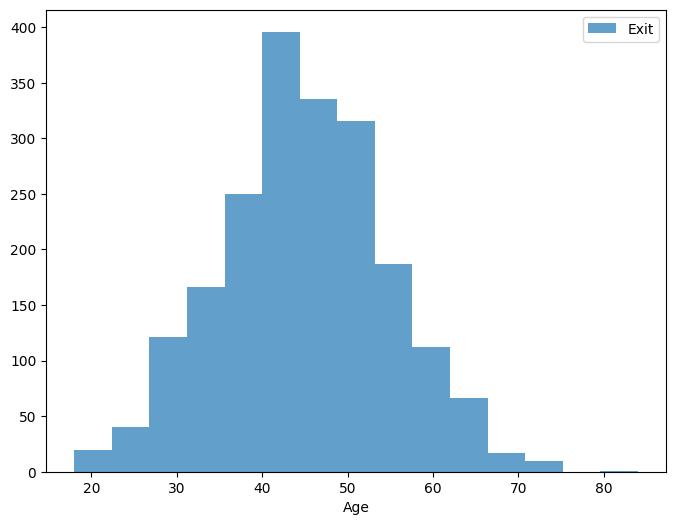

In [22]:
# distribution of the Age for not_exit
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(data.loc[data['Exited']==0]["Age"],bins=15, alpha=0.7, label='Not Exit')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.hist(data.loc[data['Exited']==1]["Age"],bins=15, alpha=0.7, label='Exit')
plt.legend(loc='upper right')
plt.show()

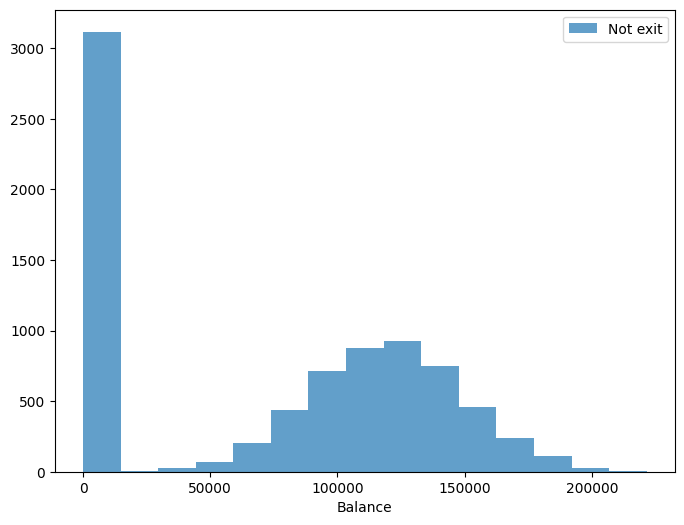

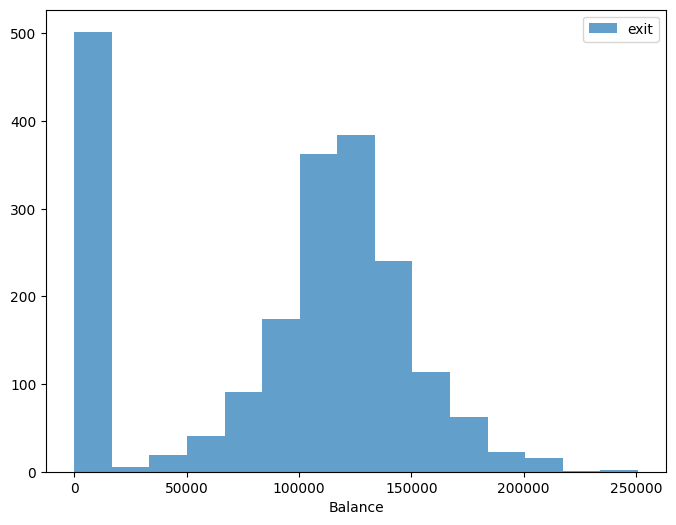

In [23]:
# distribution of the Balance for churn
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(data.loc[data['Exited']==0]["Balance"],bins=15, alpha=0.7, label='Not exit')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(data.loc[data['Exited']==1]["Balance"],bins=15, alpha=0.7, label='exit')
plt.legend(loc='upper right')
plt.show()

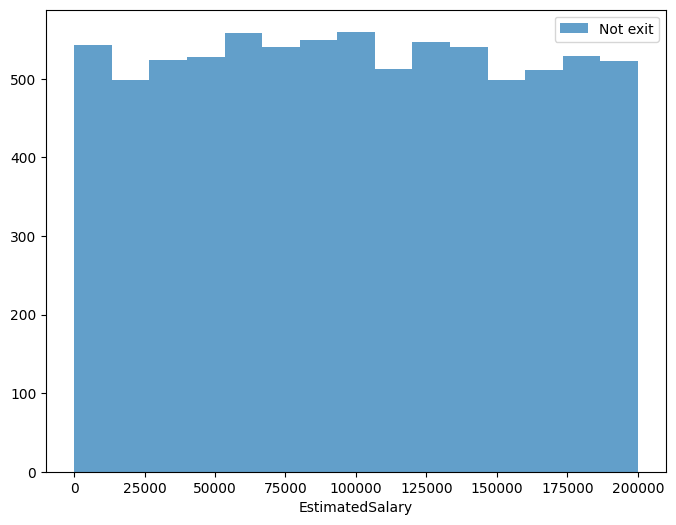

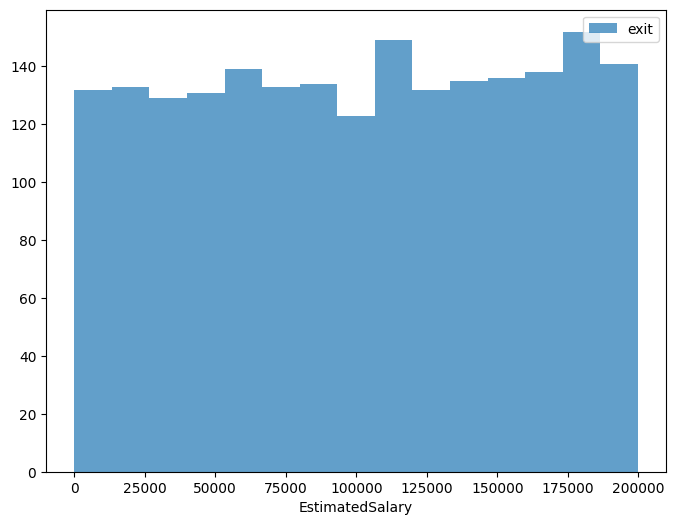

In [24]:
# distribution of the estimated_salary for exit
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(data.loc[data['Exited']==0]["EstimatedSalary"],bins=15, alpha=0.7, label='Not exit')
plt.legend(loc='upper right')
plt.show()
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(data.loc[data['Exited']==1]["EstimatedSalary"],bins=15, alpha=0.7, label='exit')
plt.legend(loc='upper right')
plt.show()

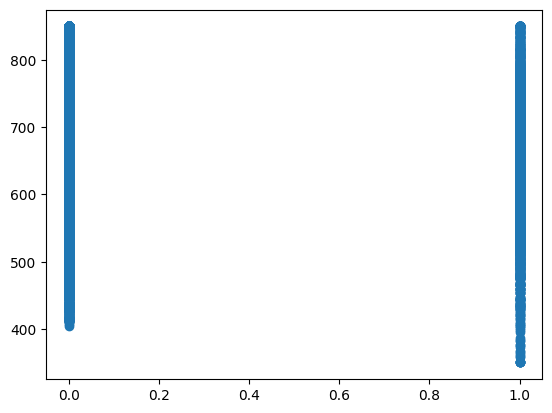

In [25]:
plt.scatter(data.Exited,data.CreditScore)

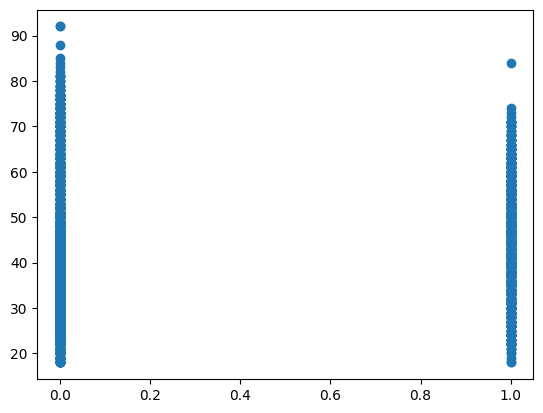

In [26]:
plt.scatter(data.Exited,data.Age)

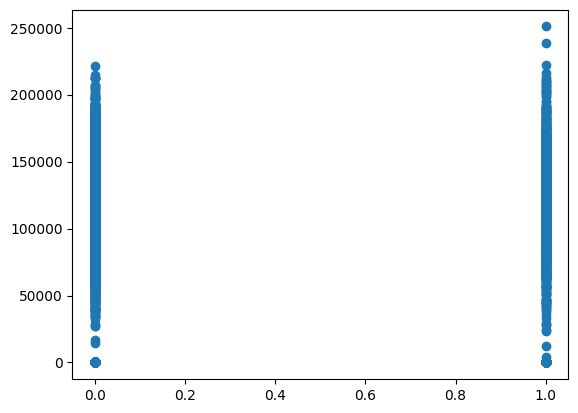

In [27]:
plt.scatter(data.Exited,data.Balance)

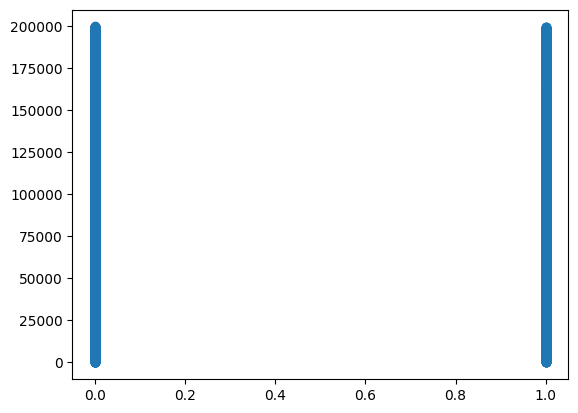

In [28]:
plt.scatter(data.Exited,data.EstimatedSalary)

In [29]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df = data.drop(['Geography', 'Gender'],axis=1)

In [31]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Axes: >

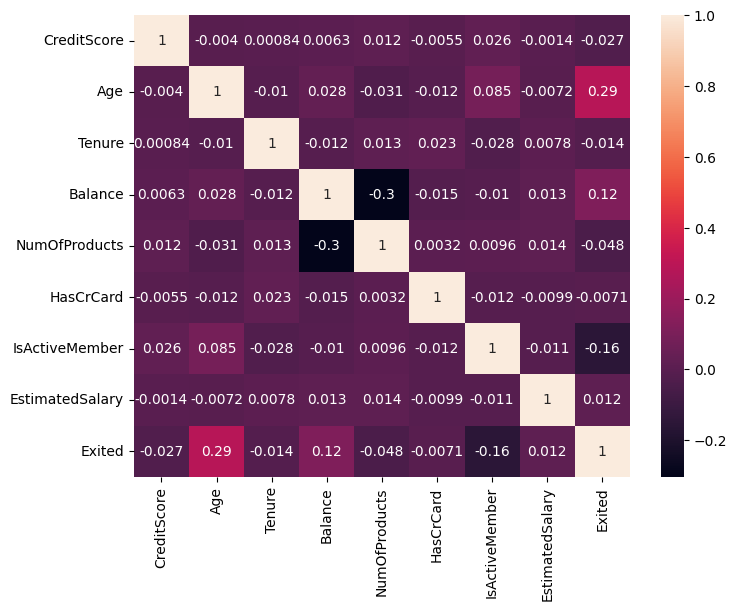

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

## Data Modelling

In [33]:
data = pd.get_dummies(data,columns = ['Gender','Geography'],drop_first = True)

In [34]:
data = data.astype(int)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1


In [35]:
X = data.drop('Exited',axis = 1)

In [36]:
y = data['Exited']

In [37]:
from sklearn.model_selection import train_test_split 

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = PowerTransformer()
# scaler = QuantileTransformer()
# scaler = RobustScaler()

In [39]:
X = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [42]:

models = {
    'LR': LogisticRegression(solver='liblinear',random_state=42),
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(random_state=42),
    'RF': RandomForestClassifier(random_state=42,n_estimators = 200, max_depth = 7),
    'SVR': SVC(gamma='auto',random_state=42),
    'GB':GradientBoostingClassifier(learning_rate= 0.05, max_depth= 3, n_estimators= 200,random_state=42)
}

In [43]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    model_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(model_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))
    plt.show()
    return accuracy, precision

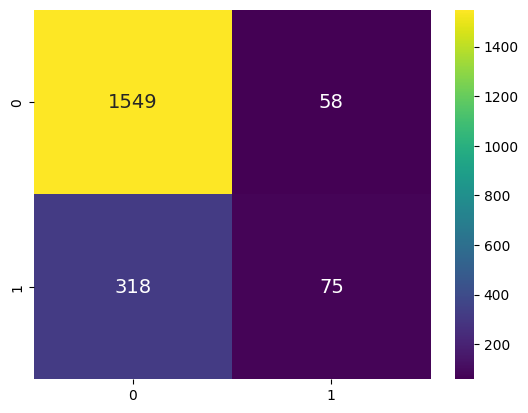

For  LR
Accuracy - 0.812
Precision - 0.5639097744360902


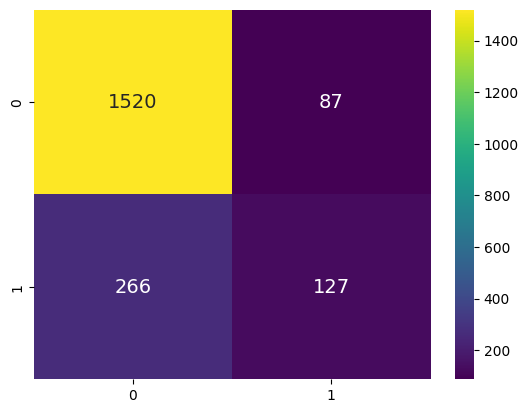

For  KNN
Accuracy - 0.8235
Precision - 0.5934579439252337


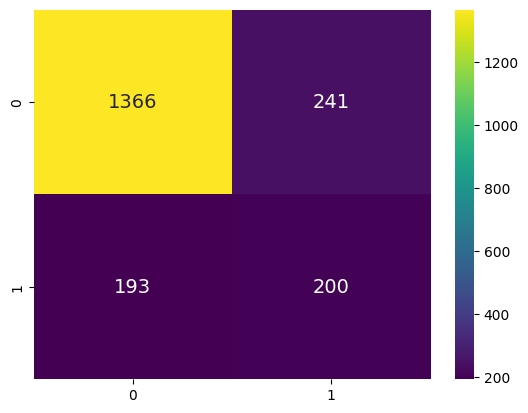

For  DT
Accuracy - 0.783
Precision - 0.45351473922902497


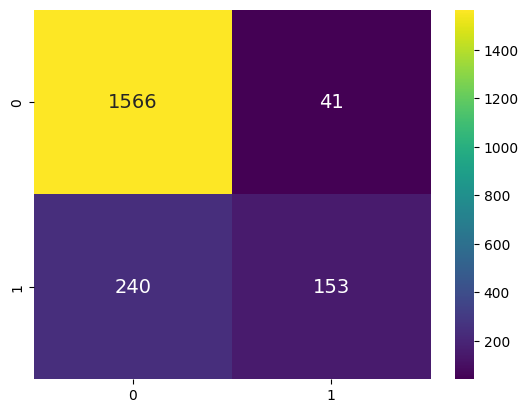

For  RF
Accuracy - 0.8595
Precision - 0.788659793814433


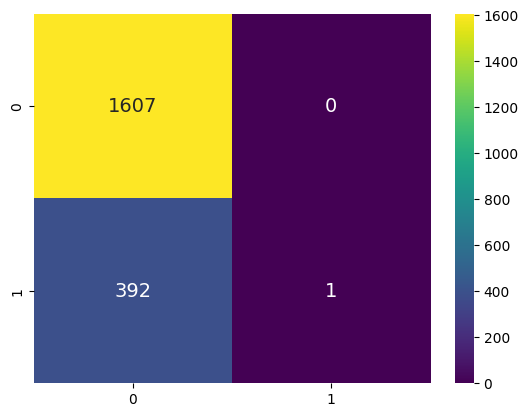

For  SVR
Accuracy - 0.804
Precision - 1.0


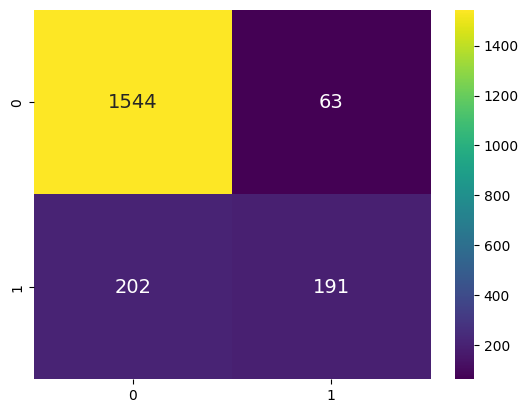

For  GB
Accuracy - 0.8675
Precision - 0.7519685039370079


In [44]:
accuracy_scores = []
precision_scores = []

for name, models in models.items():
    current_accuracy, current_precision = train_classifier(models, X_train, y_train, X_test, y_test)
    print("For ",name)
    print("Accuracy -",current_accuracy)
    print("Precision -",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

__The Best model is RandomForest model with a learning rate of 0.05, max depth of 7, and 200 estimators achieved an accuracy of 0.8595. It showed a precision of 0.788659. The model indicating good performance in distinguishing between positive and negative cases. Overall, the model demonstrated promising results, although further improvements can be made. Trialing wiht ensembles may result in better results__

In [47]:
CreditScore	Age	Tenure	Balance	NumOfProducts	HasCrCard	IsActiveMember	EstimatedSalary	Exited	Gender_Male	Geography_Germany	Geography_Spain = pd.DataFrame(X,columns=data.columns)
features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Male','Geography_Germany','Geography_Spain']
